#**Project Proposal: Detection of Drowsiness Using Convolutional Neural Networks (CNNs)**

In [1]:
!python  --version

Python 3.10.12


In [2]:
!python3.12 -m pip install --upgrade pip

/bin/bash: line 1: python3.12: command not found


##**1-Introduction**

- **Drowsiness detection** is a critical area of research with applications in various fields, including transportation, workplace safety, and healthcare. The primary goal of this project is to develop a robust system capable of detecting drowsiness in individuals using image analysis techniques powered by **Convolutional Neural Networks** (**CNNs)**. This system aims to enhance safety and productivity by providing timely alerts and interventions to prevent accidents and improve overall well-being.

##**2-Objectives**

- **1-Develop a Drowsiness Detection Mode**l: Utilize CNNs to build a model that can accurately detect signs of drowsiness in facial images.

- **2-Create a Comprehensive Dataset**: Collect and curate a dataset comprising images of individuals in different states of alertness and drowsiness.

- **3-Real-time Detection**: Implement a system capable of performing real-time drowsiness detection from live video feeds.

- **4 Evaluate and Optimize**: Assess the model's performance using various metrics and optimize it to ensure high accuracy and reliability.

##**3-Methodology**

- **1-Data Collection**:Gather images from publicly available datasets and real-world scenarios where individuals exhibit signs of drowsiness.
Ensure the dataset includes diverse representations of drowsiness indicators, such as eye closure, yawning, and head nodding.



- **2-Data Preprocessing**:Normalize and resize images to a uniform size suitablefor CNN input.
Apply data augmentation techniques to increase the variability and robustness of the dataset.

- **3-Model Development**:Design and implement a CNN architecture tailored for facial feature extraction and drowsiness detection.
Experiment with different architectures and hyperparameters to find the optimal configuration.

- **4-Training and Validation**:Train the CNN model using the collected dataset, utilizing a portion of the data for validation to monitor performance and prevent overfitting.
Use techniques such as cross-validation to ensure the model's generalizability.

- **5-Real-time Implementation**:Develop a system that integrates the trained CNN model to process live video feeds and detect drowsiness in real-time.
Implement alert mechanisms to notify users or authorities when drowsiness is detected.

- **6-Evaluation and Optimization**:Evaluate the model using metrics such as accuracy, precision, recall, and F1-score.
Perform iterative optimization based on evaluation results to enhance model performance.

##**4-Applications**

- **1-Transportation**: Monitor drivers in real-time to prevent accidents caused by
 drowsiness.

- **2-Workplace Safety**: Ensure employees in critical roles, such as machinery operation, are alert and safe.

- **3- Healthcare**: Assist in monitoring patients for signs of drowsiness, especially in sleep studies and related fields.

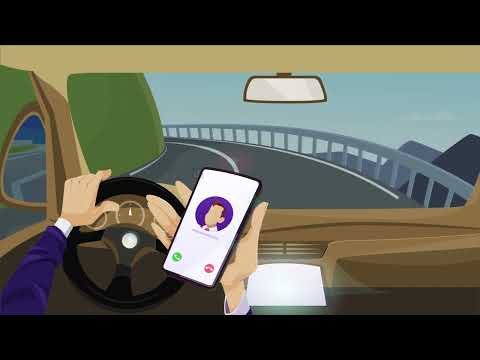

In [3]:
from IPython.display import YouTubeVideo
video_id ='qu8ZUWudetU'
YouTubeVideo(video_id)

- We can see from the image how much accidents are the risks to a society.

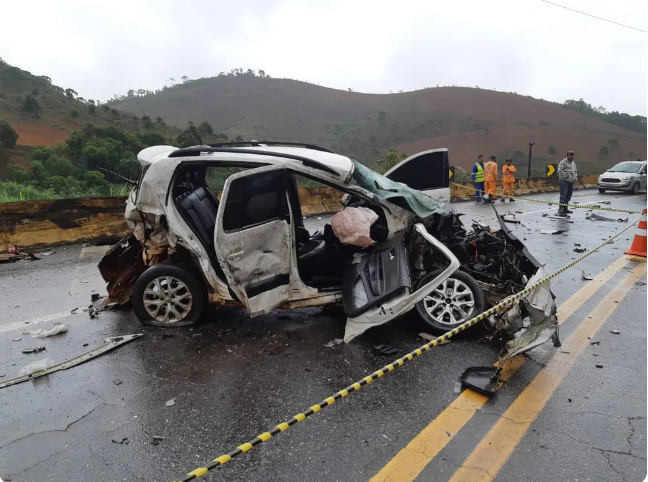

- Certainly, there are several causes for the occurrence of accidents.

- **The question is**, is there a way to stop these **accidents?** , i.e. to reduce the rate of accidents due to a specific **cause** ?.

- **For our goal**, we want to mitigate the accident rates that are caused by sleep during the process of driving on the road.

- To be able to accomplish this task, we will use **convolutional neural networks (CNN)** as support.

##**What are convolutional neural networks?**

- **Convolutional neural networks** are a type of machine
  learning model that can perform several specific tasks such as **segmentation**, **detection** and **classification** of objects in unstructured data such as **(images and videos)**

- Also called CNN for short,**CNN** is widely used to solve problems in the field of **computer vision**

- With **CNN** it is possible to create a **system** to reduce the rates of accidents due to sleep on the roads.

###**System architecture**

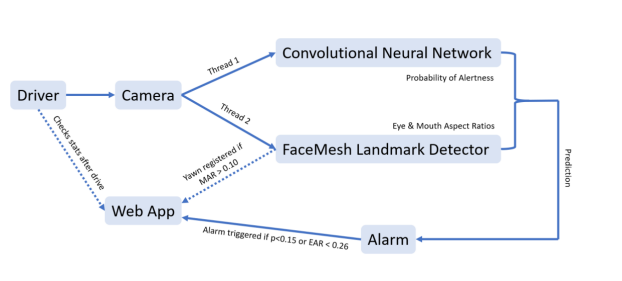

- This is how the system will work according to the **architecture**.

#**1-Data Extraction**

- Initially we need to create a mechanism to **obtain the data to train the model**.

- **Fortunately** the data that will be used to train the model
 is in **google drive**, we just need to create a pipeline to extract this data.

- Just a visual representation to **illustrate the process** that will be done.

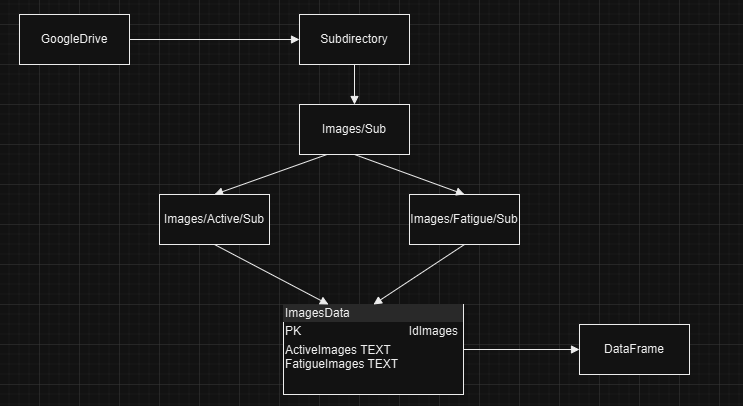

In [4]:
import sqlite3
import os
import pandas as pd

In [5]:
class DataBaseCard:
  def __init__(self):
    self.CON=None


  @property
  def GetConnection(self):
    if self.CON is None:
      return f'Error.'
    return self.CON

  def CreateConnection(self,link):
    try:
      link=str(link)
      self.CON=sqlite3.connect(link)
    except (ValueError,TypeError) as e:
      raise type(e)(f'Error')

  def CreateTableImage(self):
    query="""
       CREATE TABLE IMAGES (
            IMAGE_1 TEXT,
            IMAGE_2  TEXT
       );
      """
    self.CON.execute(query)
    self.CON.commit()

  def ExtractDataImage(self,link_directory_1,link_directory_2):
    array_link_1=[]
    array_link_2=[]
    array_merge=[]

    for link_directory in (os.listdir(link_directory_1)):
      array_link_1.append(f'/content/drive/MyDrive/Images/AtiveImages/{link_directory[:50]}')

    for link_directory in (os.listdir(link_directory_2)):
      array_link_2.append(f'/content/drive/MyDrive/Images/FatigueImages/{link_directory[:50]}')

    for link in zip(array_link_1,array_link_2):
      array_merge.append((link))

    return array_merge

  def InsertDataImage(self,link_directory_1,link_directory_2):
    try:
      link_directory_1=str(link_directory_1)
      link_directory_2=str(link_directory_2)
      data=self.ExtractDataImage(link_directory_1,link_directory_2)

      query="""
          INSERT INTO IMAGES VALUES(?,?)
          """
      self.CON.executemany(query,data)
      self.CON.commit()

      data=pd.read_sql(
          "SELECT * FROM IMAGES",
          self.CON
      )
      return data

    except (ValueError,TypeError) as r:
      print(f"Erro:{r}")


- Let's now instantiate the class to do the data extraction.

In [6]:
data=DataBaseCard()

In [7]:
data.CreateConnection('My_data')

In [8]:
data.CreateTableImage()

In [9]:
data.ExtractDataImage('/content/drive/MyDrive/Images/AtiveImages','/content/drive/MyDrive/Images/FatigueImages')

[('/content/drive/MyDrive/Images/AtiveImages/_366.jpg',
  '/content/drive/MyDrive/Images/FatigueImages/_126.jpg'),
 ('/content/drive/MyDrive/Images/AtiveImages/_367.jpg',
  '/content/drive/MyDrive/Images/FatigueImages/_127.jpg'),
 ('/content/drive/MyDrive/Images/AtiveImages/_368.jpg',
  '/content/drive/MyDrive/Images/FatigueImages/_128.jpg'),
 ('/content/drive/MyDrive/Images/AtiveImages/_369.jpg',
  '/content/drive/MyDrive/Images/FatigueImages/_129.jpg'),
 ('/content/drive/MyDrive/Images/AtiveImages/_37.jpg',
  '/content/drive/MyDrive/Images/FatigueImages/_13.jpg'),
 ('/content/drive/MyDrive/Images/AtiveImages/_370.jpg',
  '/content/drive/MyDrive/Images/FatigueImages/_130.jpg'),
 ('/content/drive/MyDrive/Images/AtiveImages/_371.jpg',
  '/content/drive/MyDrive/Images/FatigueImages/_131.jpg'),
 ('/content/drive/MyDrive/Images/AtiveImages/_372.jpg',
  '/content/drive/MyDrive/Images/FatigueImages/_132.jpg'),
 ('/content/drive/MyDrive/Images/AtiveImages/_373.jpg',
  '/content/drive/MyDrive/

In [10]:
data=data.InsertDataImage('/content/drive/MyDrive/Images/AtiveImages','/content/drive/MyDrive/Images/FatigueImages')

In [11]:
data.head(5)

IMAGE_1  \
0  /content/drive/MyDrive/Images/AtiveImages/_366...   
1  /content/drive/MyDrive/Images/AtiveImages/_367...   
2  /content/drive/MyDrive/Images/AtiveImages/_368...   
3  /content/drive/MyDrive/Images/AtiveImages/_369...   
4  /content/drive/MyDrive/Images/AtiveImages/_37.jpg   

                                             IMAGE_2  
0  /content/drive/MyDrive/Images/FatigueImages/_1...  
1  /content/drive/MyDrive/Images/FatigueImages/_1...  
2  /content/drive/MyDrive/Images/FatigueImages/_1...  
3  /content/drive/MyDrive/Images/FatigueImages/_1...  
4  /content/drive/MyDrive/Images/FatigueImages/_1...

- The data has been **successfully obtained**, now we can perform some analysis.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as  np
import cv2

- These are the **images** that we're going to use to train **our model**.

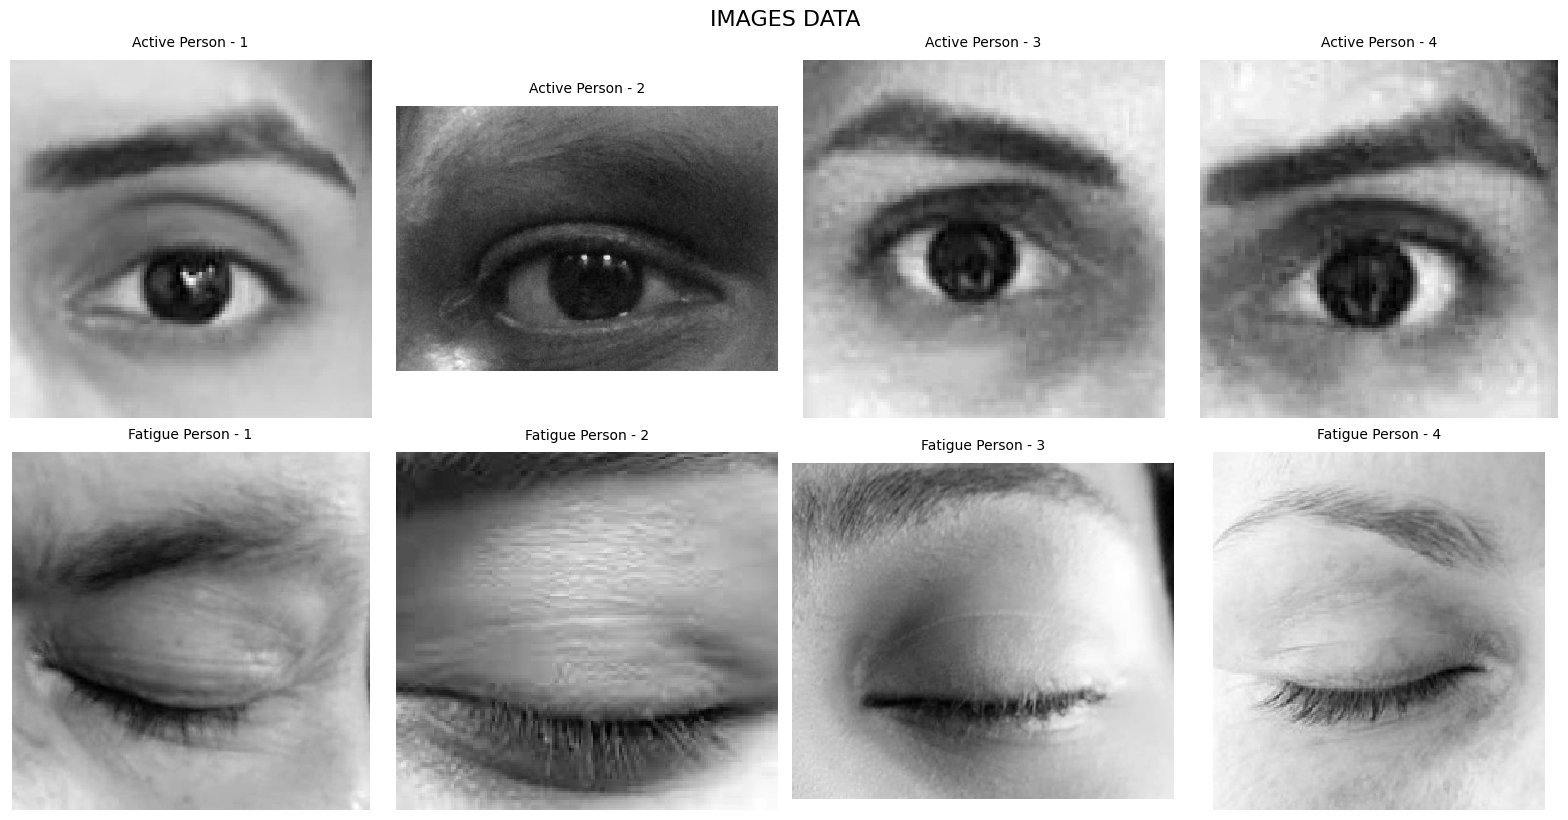

In [13]:
num_images = 4
dpi = 100
fig, axes = plt.subplots(nrows=2, ncols=num_images, figsize=(16, 8), dpi=dpi)

for index in range(num_images):
    img_path = data.iloc[index]['IMAGE_1']
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    axes[0, index].imshow(img, cmap='gray', interpolation='nearest')
    axes[0, index].axis('off')
    axes[0, index].set_title(f'Active Person - {index+1}', fontsize=10, pad=10)

for index in range(num_images):
    img_path = data.iloc[index]['IMAGE_2']
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    axes[1, index].imshow(img, cmap='gray', interpolation='nearest')
    axes[1, index].axis('off')
    axes[1, index].set_title(f'Fatigue Person - {index+1}', fontsize=10, pad=10)

plt.tight_layout()
plt.suptitle('IMAGES DATA', fontsize=16, y=1.02)

plt.show()


- We can see that we have 2 types of images here, tired people, and active people.

- The model will be trained with **these images** in order to **classify** **active** and **non-active** people in cars when they are on the road.

#**2-Convolution Intuition**

- Well, convolution is an operation between 2 functions that results in **another function**

- This is the mathematical **definition of convolution.**

$$
x(t) = \int x(a)w(t - a) \, da
$$


- That's just a mathematical definition, when we go to artificial neural networks, actually these functions that the convolution refers to are the input **image (I)**, and **kernel array (K)**.

###**2.1-Neural Network**

####**1-Definition and Intuition.**

- Before we talk about CNN, let's try to understand the DNN **(deep neural network)** architecture a little bit

- **Neural networks** are machine learning models based on brain dynamics as I said before

- They are **machines** that try to model or structure how the **human brain** performs tasks.

In [14]:
# @title ###**Biological neuron.**###
from IPython.display import display, Image
gif_url = "https://adatis.co.uk/wp-content/uploads/bio-neuron.gif"
display(Image(url=gif_url, width=500, height=300))


- As much as artificial **neural networks** try to model how the human brain performs specific tasks, it is still very **difficult** for artificial neural networks to be able to perform tasks equal to the **human brain**

####**2- Neurons**

- Neural networks are made up of **neurons**, each neuron can be defined as a **processor**, this processor is responsible for **storing knowledge.**


- For each **input** (signal) that comes to a specific neuron we have a weight associated with it, also called strength of connections, or **synaptic weights.**

In [15]:
# @title ####**So, what does a neuron do in an artificial neural network ?**
from IPython.display import display, Image
gif_url = "https://c.mql5.com/2/35/artificialneuron__1.gif"
display(Image(url=gif_url, width=500, height=300))


- A neuron in neural networks has the function of storing **knowledge and detecting patterns** through input data ...

- How does this **happen** ?

- Artificial neurons calculate a **weighted sum** of the input data and then apply an **activation function.**

- When we talk about **weighted sum**, we refer to a **linear model**

- In a nutshell, a linear model attempts to capture **relationships between** the predictor variables and the response variable.

- Example of a **linear model.**:
$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_n X_n + \varepsilon
$$


####**Why do neural networks use activation functions ?**

- **Activation functions** are used to introduce nonlinearity **into the network**.

+ After calculating a sum and weighted of the observations, an activation function is applied to that sum result.

+ Why apply an **activation function ?**

- **The relationship in the real world is not always linear**, the brain is a machine that operates in a distributed and **non-linear way**, we can notice by its structure, for example sound waves do not represent linear data, if we want the network **to learn to detect** these waves in an efficient way, then we need to apply this

- The weighted sum $( z )$:
$$
 \
z = \sum_{i=1}^{n} w_i \cdot x_i + b
\
$$

- The **neuron** output $( y )$ applying the activation
 function $( \sigma )$:
$$
\
y = \sigma\left( \sum_{i=1}^{n} w_i \cdot x_i + b \right)
$$

- The sigmoid **activation function** $( \sigma(z) )$:
$$
\
\sigma(z) = \frac{1}{1 + e^{-z}}
\
$$
- Finally, the neuron output using the **sigmoid**
 activation function:
$$
\
y = \frac{1}{1 + e^{-\left(\sum_{i=1}^{n} w_i \cdot x_i + b\right)}}
\
$$


- Let's now understand what happens inside a **neuron visually.**

- Let's suppose we have a problem where we want to **classify** whether a person is **fraudulent or not**.


- When we have a supervised learning problem, we want a model to **map a specific function**, that is, to approximate a function.

$$
H(X) \approx Y
$$


- In this case, the **goal** is to model a specific function that **maps the inputs**, in this case the information we have, to a desired **output**.

- An artificial neuron may be able to perform this task, this n**euron can learn to detect patterns** that map the inputs to the desired outputs. In this case, it would assign each input data to a **specific category** according to the signal it **mapped**.

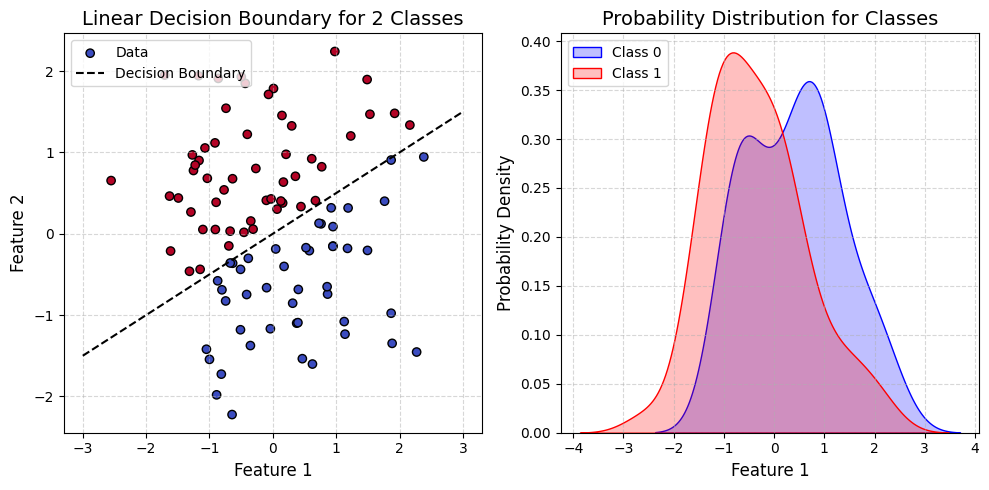

In [16]:
# @title $ H(X) \approx Y $

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)
X = np.random.randn(100, 2)
m = 0.5
b = 0

y = np.zeros(100)
y[X[:, 1] > m*X[:, 0] + b] = 1

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', label='Data')
x_values = np.linspace(-3, 3, 100)
plt.plot(x_values, m*x_values + b, 'k--', label='Decision Boundary')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('Linear Decision Boundary for 2 Classes', fontsize=14)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)

plt.subplot(1, 2, 2)
sns.kdeplot(X[y == 0, 0], color='blue', fill=True, label='Class 0')
sns.kdeplot(X[y == 1, 0], color='red', fill=True, label='Class 1')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.title('Probability Distribution for Classes', fontsize=14)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


- We might think that this would be the task that a single neuron would be **performing.** However, neural networks have **several neurons** in operation, each of them trying to learn how to **detect patterns**.

- This is an example of how **each neuron** within the hidden layers **is learning to map its inputs** to a **specific category**.

In [17]:
# @title **Neurons in Actions**
from IPython.display import IFrame
url = "https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2,2,2,2,2&seed=0.18097&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false"
IFrame(url, width=900, height=600)


#**3-Deep Neural Network (DNN)**

- As we **described earlier**, neural networks are ML models that are based on **brain dynamics**. We've seen how a single neuron can **map** or model a function through its inputs, trying to get closer to **optimal responses**

- How does a neural network manage to store knowledge ? , **how does this happen** ? How does it manage to **map** an input to a desired **category as output ?**

##**3.1-How do neural networks learn?**

- There are **different types** of learning, each is modeled **differently**.

- Let's base it on **learning by a teacher**, or l**earning by correction**.

###**1-Learning by a teacher**

- Let's imagine that we have a **binary classification** problem, we want to **classify** whether a person is **fraudulent** or not.

- When we talk about **learning by a teacher** we're referring to the network's learning being based on the **examples we want the network to learn**.

- For a **binary classification problem**, there is a set of **labels**, that is, each observation that exists in the training set is linked to an answer that are **these labels**

 - This is the **cost function of logistic regression** for a binary classification problem.

 $$ J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_{\theta}(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_{\theta}(x^{(i)})) \right] $$

- What do we **want ?**


- During model **training**, our goal is to **minimize** this **function**. ...

- In this training there are the actual labels, and the output of the model .. In this case, **we compute the difference between the actual label and the network prediction**. The result of this operation tells us how much the neural network is **inferring** in a certain way. If this difference is **too large**, the network is trained or tuned to have outputs close to the **actual labels**

- Let's visualize this **cost function** in a geometric shape ...

In [18]:
# @title **Loss Function**
import plotly.graph_objects as go
from plotly.subplots import make_subplots


def cost_positive(x):
    return -np.log(x)

def cost_negative(x):
    return -np.log(1 - x)

X = np.linspace(0.01, 0.99, 100)

fig = make_subplots(rows=1, cols=1, subplot_titles=("Negative Logarithmic Cost Function"))

fig.add_trace(go.Scatter(x=X, y=cost_positive(X), mode='lines', name='Cost - Positive Class', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=X, y=cost_negative(X), mode='lines', name='Cost - Negative Class', line=dict(color='red', dash='dash')))

fig.update_layout(
    xaxis=dict(title='$h_{\\Theta}(x)$', showgrid=False),
    yaxis=dict(title='Cost', showgrid=False),
    title='Negative Logarithmic Cost Function - Positive and Negative Classes',
    showlegend=True,
    width=800,
    height=500,
)

fig.show()


- We want the model to estimate low probabilities for negative instances (Y=0), and we want it to **estimate high** probabilities for positive instances **(Y=1)** because if the output of the **model is > 0.5** then we classify it as 1, in case it is less < 0.5 then we classify it as 0

$$
\
\text{Prediction} = \begin{cases}
    1 & \text{se } \text{Sigmoid}(y) > 0.5 \\
    0 & \text{se } \text{Sigmoid}(y) \leq 0.5
\end{cases}
\
$$

$$ \text{Where } \text{Sigmoid}(y) = \frac{1}{1 + \exp(-y)} \text{ and } y = B_0 + B_1X_1 + B_2X_2 + \ldots + B_nX_n.
\
$$


- However, in order for the model to have outputs close to the **real labels**, that is, to properly map each input signal to a **specific category**, it is necessary that the network parameters such as the **weights**, **interception** and the **activation function** are adequate, otherwise the model will have very **different** outputs from the **real labels**

## **3.2-Training Neural Networks**

- The training of neural networks consists of finding which are the **best hyperpameters** that aim to **minimize the cost function.**

- Before we can train a **neural network**, we need to follow **essential points.**

- Unlike other models, the knowledge of neural networks is acquired in a **specific environment**, with a **learning system**

###**2-Training Process**

- The procedure of **training the neural networks** involves the following steps.

- 1-Define the **architecture** of the neural network

- 2-Define how many **hidden layers** the network will have and
 how many **neurons per hidden layer**.

- 3-Define what kind of **activation function will be used** according to the specific task both in the hidden layers and both in the **output layer**

- 4-Define a strategy for **initializing** the network parameters such as **weights and interception**, both for the **hidden layers** and the output layers according to the **specific problem**.

####**1-Arquitecture**

- We can also define a neural network as a weighted **oriented graph** consisting of **vertices and edges**. In this case such vertices are the **artificial neurons**, and such edges are the **weighted weights**.

In [19]:
# @title **Visual Arquitecture**
from IPython.display import display, Image
gif_url = "https://images.squarespace-cdn.com/content/v1/5800c6211b631b49b4d63657/1517072201941-37JOI5UBDVSD7I4IBF0W/fullyconnected_525.gif"
display(Image(url=gif_url, width=400, height=450))


- This is one of the ways to represent the **architecture** of a neural network as **we can see.**

- There are **different neural network architectures**. This is one of them,

- In this architecture, we have the **input layer**, the **hidden layers**, and the **output layer**.

- Each neuron in a **specific layer** is fully connected to all the neurons in the **previous layer**, we call this type of connection **fully dense layers**.

####**2-Activation function**

- As we **said before**, the functions of activations play an important role in neural networks. This allows the neural network to capture a more complete **relationship** between the **predictor variables and the output variable**

- There are **different types** of activation functions, but we will talk about the most **important ones**.

- Let's look at **an example**, let's imagine that the input data of a variable, has this **distribution**.

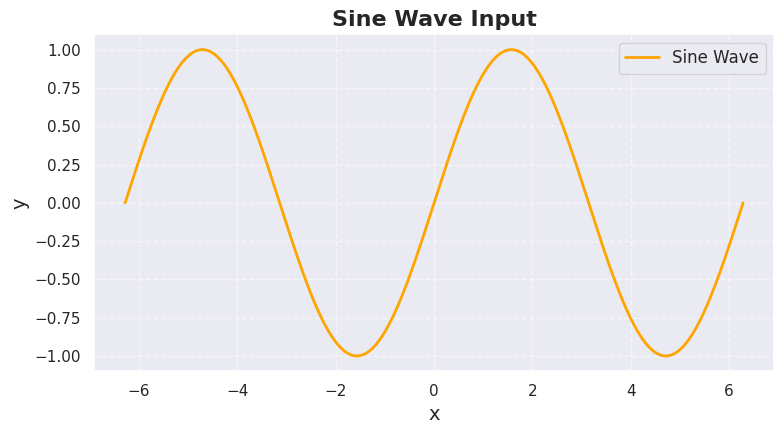

In [20]:
# @title **Sine Wave Input**.
sns.set(style='darkgrid')
x = np.linspace(-2 * np.pi, 2 * np.pi, 400)
y_sin = np.sin(x)

fig, ax = plt.subplots(figsize=(8, 4.5))
ax.plot(x, y_sin, label='Sine Wave', color='orange', linewidth=2)
ax.set_title('Sine Wave Input', fontsize=16, fontweight='bold')
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)

ax.legend(fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig('sine_wave_plot.png', dpi=300, bbox_inches='tight')

plt.show()


- In this case the input data **describes** a non-linear behavior, if we wanted the neural network to map the inputs to a specific category then it is necessary to introduce **non-linearity** into the network...

#####Activation Functions in Neural Networks

1. **Sigmoid Function:**
   $$\sigma(x) = \frac{1}{1 + e^{-x}}$$

   The **sigmoid function** is used to produce binary outputs in neural networks, ranging between 0 and 1.

2. **Hyperbolic Tangent Function:**
   $$\tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}$$

   The **hyperbolic tangent** function is a scaled version of the sigmoid function, ranging between -1 and 1, useful for symmetric output ranges.

3. **Rectified Linear Unit (ReLU):**
   $$\text{ReLU}(x) = \max(0, x)$$

   The **rectified linear** unit is a popular activation function that returns zero for negative input values and linear for positive values.

4. **Leaky ReLU Function:**
   $$\text{LeakyReLU}(x) = \begin{cases} x, & \text{if } x > 0 \\ \alpha x, & \text{if } x \leq 0 \end{cases}$$

   The Leaky ReLU is a variation of ReLU that allows a small slope $(\alpha)$ for negative inputs, helping to mitigate the issue of "dead neurons".

5. **Softmax Function:**
   $$\text{Softmax}(x_i) = \frac{e^{x_i}}{\sum_{j} e^{x_j}}$$

   The **softmax function** is primarily used in the output layer of neural networks to produce normalized probabilities for multiple classes.

6. **Linear Function:**
   $$f(x) = x$$

   The linear function simply returns the input without any change and is used in certain types of neural networks and linear models.


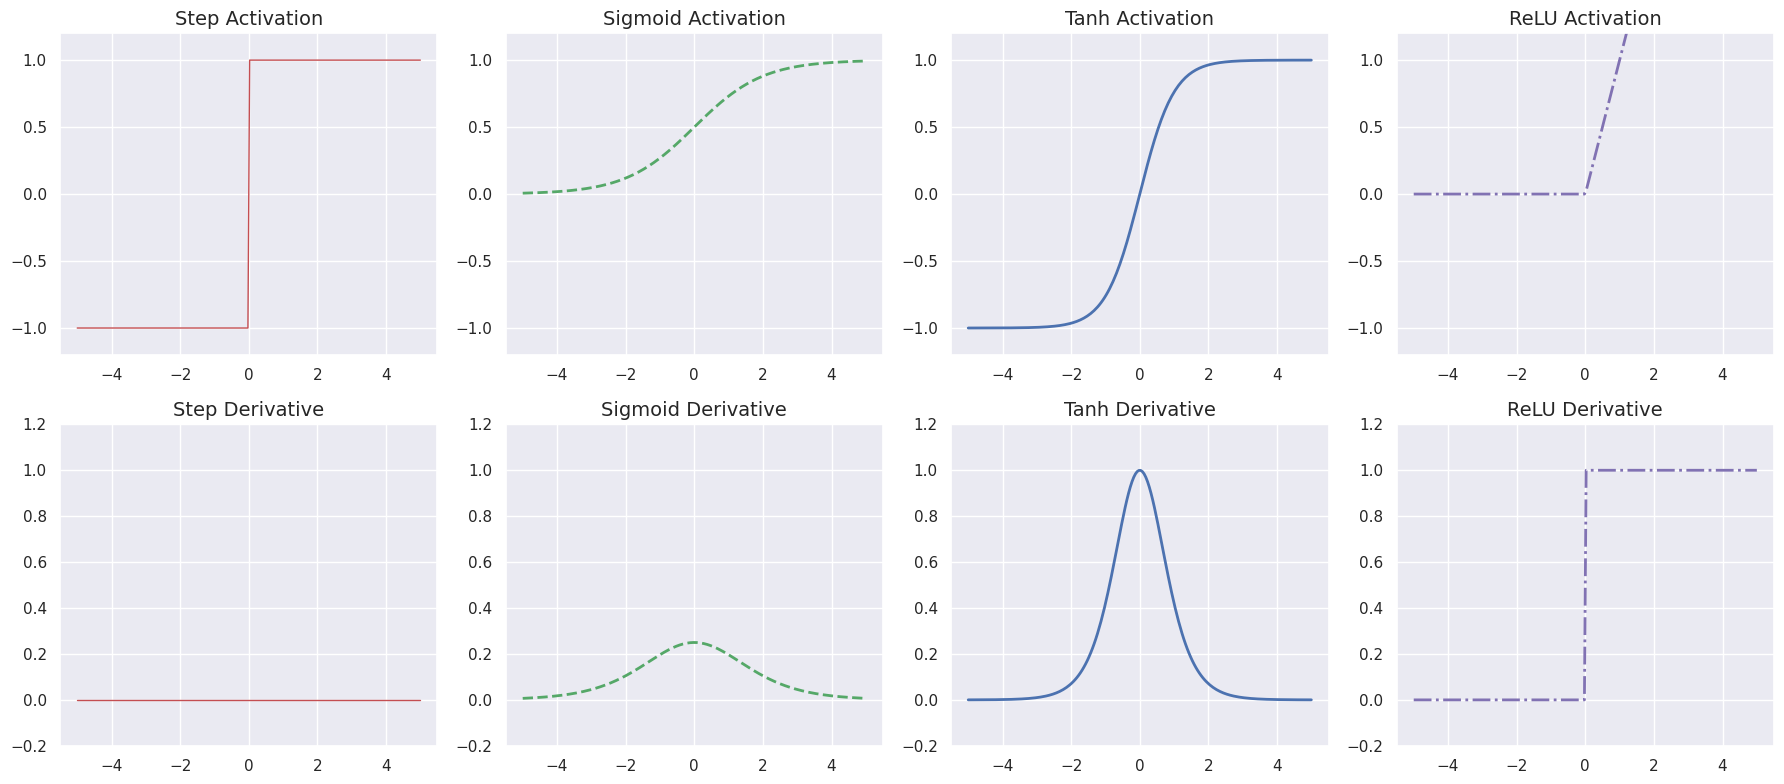

In [21]:
# @title **Ativation Functions**
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

def relu_derivative(z):
    return (z > 0).astype(float)

z = np.linspace(-5, 5, 200)

fig, axs = plt.subplots(2, 4, figsize=(18, 8))

axs[0, 0].plot(z, np.sign(z), "r-", linewidth=1, label="Step")
axs[0, 0].set_title("Step Activation", fontsize=14)
axs[0, 0].grid(True)
axs[0, 0].set_ylim([-1.2, 1.2])

axs[1, 0].plot(z, np.zeros_like(z), "r-", linewidth=1, label="Step Derivative")
axs[1, 0].set_title("Step Derivative", fontsize=14)
axs[1, 0].grid(True)
axs[1, 0].set_ylim([-0.2, 1.2])

axs[0, 1].plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
axs[0, 1].set_title("Sigmoid Activation", fontsize=14)
axs[0, 1].grid(True)
axs[0, 1].set_ylim([-1.2, 1.2])

axs[1, 1].plot(z, sigmoid_derivative(z), "g--", linewidth=2, label="Sigmoid Derivative")
axs[1, 1].set_title("Sigmoid Derivative", fontsize=14)
axs[1, 1].grid(True)
axs[1, 1].set_ylim([-0.2, 1.2])

axs[0, 2].plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
axs[0, 2].set_title("Tanh Activation", fontsize=14)
axs[0, 2].grid(True)
axs[0, 2].set_ylim([-1.2, 1.2])

axs[1, 2].plot(z, 1 - np.tanh(z) ** 2, "b-", linewidth=2, label="Tanh Derivative")
axs[1, 2].set_title("Tanh Derivative", fontsize=14)
axs[1, 2].grid(True)
axs[1, 2].set_ylim([-0.2, 1.2])

axs[0, 3].plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
axs[0, 3].set_title("ReLU Activation", fontsize=14)
axs[0, 3].grid(True)
axs[0, 3].set_ylim([-1.2, 1.2])

axs[1, 3].plot(z, relu_derivative(z), "m-.", linewidth=2, label="ReLU Derivative")
axs[1, 3].set_title("ReLU Derivative", fontsize=14)
axs[1, 3].grid(True)
axs[1, 3].set_ylim([-0.2, 1.2])

plt.tight_layout()

plt.show()


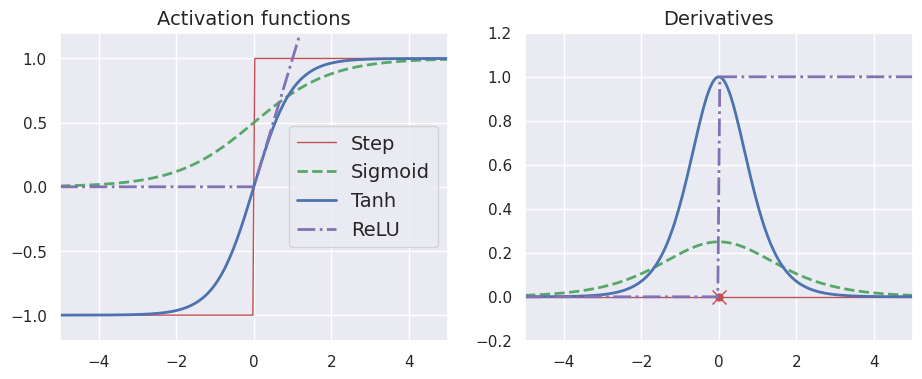

In [22]:
# @title **Ativations Functions Derivative**
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

###**3-inialization strategy**

- The **startup strategy** was one of the factors that improved the training of the **deep neural networks**.

- **Initialization strategies** allow you to add information prior to the **neural network**

- This **pre-information** is the neural **network weights** and **intercepts** **for each layer**.

- It will be with this **prior information** that the model will be **trained** to update its beliefs and find the **best parameters.**

- The **activation functions** made the training of the neural networks much **more efficient.**

- **Neural networks** presented a major problem... When the **previous information** was added to the **neural network** before training, in this case the **weights** and **interceptions**, these **weights** cause instability during **training**.

- **These errors** were caused because the activation functions **saturated** to very **small** and **large** values of this **prior information that was added.**

- We call this the **Vanishing/Exploding** **Gradients** Problem.

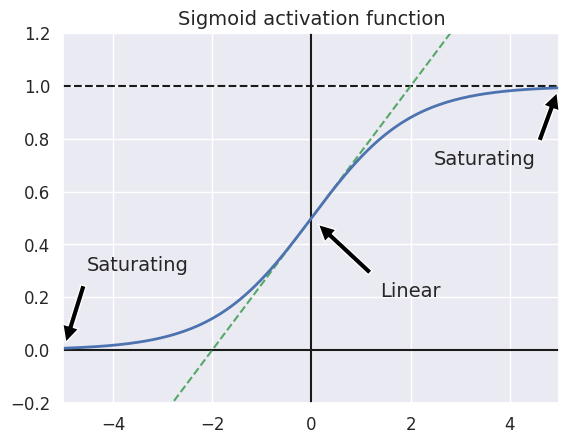

In [23]:
# @title ##**Vanishing/Exploding** **Gradients Problem.**##
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

def logit(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])
plt.show()

- For this problem, startup strategies have been **created to deal with this problem.**

- There are actually several **startup strategies**, but we're going to use the one that **works best**.

###### Purpose of **Startup Strategy.**

- The **initialization strategy** allows the information provided in this case the **weights and intercepts** in the layers to be **initialized** in an appropriate way, ensuring that the **network parameters** are neither too **large** nor too **small**

- Let's use the **initialization strategy** of **Xavier** and **He Initialization**.

- **Xavier initialization (Glorot initialization)**
 Xavier proposed a more **straightforward method**, where the
 weights such as the variance of the **activations** are the same
 across every layer. This will prevent the **gradient** from
 **exploding or vanishing**.


$$\text{Var}(w) = \begin{cases}
    \frac{2}{n_{\text{in}} + n_{\text{out}}} & \text{for input layer} \\
    \\
    \frac{1}{n_{\text{in}}} & \text{for hidden layers}
\end{cases}
$$

$$
w \sim \mathcal{U}\left(-\sqrt{\frac{6}{n_{\text{in}} + n_{\text{out}}}}, \sqrt{\frac{6}{n_{\text{in}} + n_{\text{out}}}}\right) \quad \text{for input layer}
$$
$$
w \sim \mathcal{U}\left(-\sqrt{\frac{2}{n_{\text{in}}}}, \sqrt{\frac{2}{n_{\text{in}}}}\right) \quad \text{for hidden layers}
$$

- In these **formulas**:
- $( n_{\text{in}} )$ represents the number of neurons in the previous layer (for hidden layers) or the input layer (for input layer).
- $( n_{\text{out}} )$ represents the number of neurons in the next layer (for input layer) or the output layer.

- These expressions summarize the **Glorot (Xavier)** initialization strategies for
 neural networks, specifying both the variance of weights $( w )$ and the uniform distribution ranges used for initialization based on the layer type (input or hidden).


- **He initialization (Kaiming initialization)**
 This initialization preserves the **non-linearity of activation**
 functions such as **ReLU activations**. Using the He method,
 we can reduce or magnify the **magnitudes of inputs**
 exponentially.

$$\text{Var}(w) = \begin{cases}
    \frac{2}{n_{\text{in}}} & \text{for ReLU activation}
\end{cases}
$$

$$
w \sim \mathcal{N}\left(0, \sqrt{\frac{2}{n_{\text{in}}}}\right) \quad \text{for ReLU activation}
$$


- There are **different startup strategies**, each with its **advantages**.

###**4 -Training**

- So far, we've talked about aspects that are essential to **training a neural network efficiently**


- Now we can train neural **networks efficiently**

- Now, how neural **network training works ?**

- When we **talk about training**, in a nutshell we say that we want the model to learn to **detect patterns** according to a **specific task**

- In our case, we want the model to detect active people and **non-active** people in **images** that will be passed to it.

- The algorithm used to train neural networks is **called backpropagation**

####**Backpropagation**

- The idea of this algorithm is to calculate **how much a specific change** in some **parameters** that feed into one layer can affect **other layers and subsequently** affect the **output** of the model and ultimately affect the **cost function**

- To understand how this algorithm works, it is necessary to understand notions about **derivatives**. in this case, the **chain rule**.

- Let's understand how this **algorithm works.**

- Our **goal** is to enter the **best parameters** that minimizes the **cost function**, in which case our loss **function** has this format.

In [24]:
# @title **Viewing the Loss Function**
from IPython.display import display, Image
gif_url = "https://mofanpy.com/static/results/tensorflow/5_15_01.gif"
display(Image(url=gif_url, width=550, height=450))

## **Backpropagation**

#### **1. Forward Pass**:
- Mini-batches are passed to the network's input layer.
Sequentially sent through each hidden layer.
Neurons compute outputs for all instances in the mini-batch.
Outputs propagate through subsequent layers until reaching the output layer.
Intermediate results are preserved for subsequent use.

#### **2. Error Measurement**:
- Compute network's output error using a chosen loss function.
Compare desired output with actual network output.
Return a quantitative measure of the error.

#### **3. Error Backpropagation**:
- Analytically calculate how much each output connection contributes to the error.
Utilize the chain rule from calculus for precise computation.
Measure error contributions from output layer connections to the layer below.

#### **4. Gradient Calculation**:
- Backward propagation through network layers using the chain rule.
Efficiently compute gradients of error across all network connection weights.
Propagate error gradients backward through the network.

#### **5. Gradient Descent**:
- Adjust network connection weights using computed error gradients.
Implement Gradient Descent to minimize error.
Update weights to enhance network prediction accuracy.


#### **Forward Pass Algorithm**

**Require:**
- Network depth, $l$
- $W^{(i)}, \ i \in \{1, \ldots, l\}$, the weight matrices of the model
- $b^{(i)}, \ i \in \{1, \ldots, l\}$, the bias parameters of the model
- $x$, the input to process
- $y$, the target output

**Initialization:**
$h^{(0)} = x$

**Forward Pass:**

for $k = 1, \ldots, l$ do
$$a^{(k)} = b^{(k)} + W^{(k)} h^{(k-1)}$$
end for



$h^{(k)} = f(a^{(k)})$



**Output:**
$\hat{y} = h^{(l)}$

**Loss Function:**
$J = L(\hat{y}, y) + \lambda \Omega(\theta)$


### **Backward Pass Algorithm**



 - **1. Gradient on Output:**
$$
g \leftarrow \nabla_{\hat{y}} J = \nabla_{\hat{y}} L(\hat{y}, y)
$$

-  **2. Loop through Layers:**
$$
\text{for } k = l, l - 1, \ldots, 1 \text{ do}
$$
-  **2.1 Convert Gradient on Layer’s Output:**
 Convert the gradient on the layer’s output into a gradient on the pre-nonlinearity activation element-wise multiplication if $f$ is element-wise:
$$
g \leftarrow \nabla_{a^{(k)}} J = g \odot f'(a^{(k)})
$$

-  **2.2 Compute Gradients on Weights and Biases:**
   including the **regularization** term, where needed:
$$
\nabla_{b^{(k)}} J = g + \lambda \nabla_{b^{(k)}} \Omega(\theta)
$$
$$
\nabla_{W^{(k)}} J = g h^{(k-1)T} + \lambda \nabla_{W^{(k)}} \Omega(\theta)
$$

-  **2.3 Propagate Gradients to Previous Layer:**
$$
g \leftarrow \nabla_{h^{(k-1)}} J = W^{(k)T} g
$$

$$
\text{end for}
$$


- Now that we have an idea of the **backpropagation algorithm**, let's try to visualize what happens to derivatives.

####**How to use the chain rule?**

##### **Example**

- We **treat the computation** of the loss as a series of calculations:


##### **Calculations**

 **Forward Pass:**
$$
\begin{aligned}
    f_0 &= \beta_0 + \omega_0 \cdot x_i \\
    h_1 &= \sin(f_0) \\
    f_1 &= \beta_1 + \omega_1 \cdot h_1 \\
    h_2 &= \exp(f_1) \\
    f_2 &= \beta_2 + \omega_2 \cdot h_2 \\
    h_3 &= \cos(f_2) \\
    f_3 &= \beta_3 + \omega_3 \cdot h_3 \\
    \ell_i &= (f_3 - y_i)^2
\end{aligned}
$$

 **Gradients:**
$$
\frac{\partial \ell_i}{\partial f_3}, \quad
\frac{\partial \ell_i}{\partial h_3}, \quad
\frac{\partial \ell_i}{\partial f_2}, \quad
\frac{\partial \ell_i}{\partial h_2}, \quad
\frac{\partial \ell_i}{\partial f_1}, \quad
\frac{\partial \ell_i}{\partial h_1}, \quad
\text{and} \quad
\frac{\partial \ell_i}{\partial f_0}
$$


 **Gradient Calculations:**

$$
\begin{aligned}
\frac{\partial \ell_i}{\partial f_2} &= \frac{\partial h_3}{\partial f_2} \left( \frac{\partial f_3}{\partial h_3} \frac{\partial \ell_i}{\partial f_3} \right) \\
\frac{\partial \ell_i}{\partial h_2} &= \frac{\partial f_2}{\partial h_2} \left( \frac{\partial h_3}{\partial f_2} \frac{\partial f_3}{\partial h_3} \frac{\partial \ell_i}{\partial f_3} \right) \\
\frac{\partial \ell_i}{\partial f_1} &= \frac{\partial h_2}{\partial f_1} \left( \frac{\partial f_2}{\partial h_2} \frac{\partial h_3}{\partial f_2} \frac{\partial f_3}{\partial h_3} \frac{\partial \ell_i}{\partial f_3} \right) \\
\frac{\partial \ell_i}{\partial h_1} &= \frac{\partial f_1}{\partial h_1} \left( \frac{\partial h_2}{\partial f_1} \frac{\partial f_2}{\partial h_2} \frac{\partial h_3}{\partial f_2} \frac{\partial f_3}{\partial h_3} \frac{\partial \ell_i}{\partial f_3} \right) \\
\frac{\partial \ell_i}{\partial f_0} &= \frac{\partial h_1}{\partial f_0} \left( \frac{\partial f_1}{\partial h_1} \frac{\partial h_2}{\partial f_1} \frac{\partial f_2}{\partial h_2} \frac{\partial h_3}{\partial f_2} \frac{\partial f_3}{\partial h_3} \frac{\partial \ell_i}{\partial f_3} \right)
\end{aligned}
$$


- In this case, we calculate the **partial derivatives** of the **cost function** with respect to some **network parameters**.

**Forward  and Backward.**

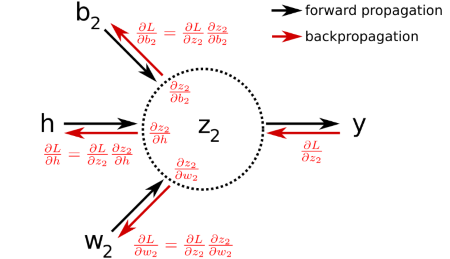










- **The backpropagation algorithm** consists of calculating the **partial derivatives** of the **cost function** with respect to the **network parameters**, in this case with respect to all the **parameters of each hidden layer**

In [25]:
# @title **Viewing backpropagation**
from IPython.display import display, Image
gif_url = "https://i.gifer.com/6fyP.gif"
display(Image(url=gif_url, width=550, height=350))

- Similarly, when we compute the **partial derivatives** of the cost function with respect to the network parameters, we need to **update the error gradients.**

###**Optimizers**

- **Optimizers are algorithms** used to **update the parameters of the network**, in this case, this update is done by having the error **gradient vector**, which are the **partial derivatives** of the **cost function** with respect to the network parameters

- There are **different types of optimizers**, some **faster** than others. Each one has its own **particularity**

- One of the most widely used optimizers is the **gradient descent**, but it is a type of algorithm that **converges slowly**, this happens because the gradient descent fluctuates a lot due to its stochastic nature

- Let's look at some comparisons **visually**.

In [26]:
# @title **Viewing Optimizers**
from IPython.display import display, Image
gif_url = "https://miro.medium.com/freeze/max/620/1*XVFmo9NxLnwDr3SxzKy-rA.gif"
display(Image(url=gif_url, width=550, height=350))

- In this case, we can see that the **gradient descent** is **slower** compared to the others, however, for this project we will **experiment** with each one.

- There are a **disadvantages and advantages** to each type of optimizer.

- One of the most widely used optimizers is the **gradient descent**, but it is a type of algorithm that **converges slowly**, this happens because the gradient descent fluctuates a lot due to its **stochastic nature**

- In this article you have a description for better understanding, **click on the link for more information**
link:***https://arxiv.org/pdf/2302.09566v1***

####**Algorithm  Stochastic gradient descent (SGD) update**

- **Require:** Learning rate schedule $\{\eta_1, \eta_2, \ldots\}$

- **Require:** Initial parameter $\theta$


- k ← 1

- while stopping criterion not met do

- Sample a minibatch of $m$ examples from the training set $\{x^{(1)}, \ldots, x^{(m)}\}$ with corresponding targets $y^{(i)}$.

- Compute gradient estimate: $\hat{g} \leftarrow \frac{1}{m} \sum_{i=1}^{m} \nabla_{\theta} \mathcal{L}(f(x^{(i)}; \theta), y^{(i)})$.

- Apply update: $\theta \leftarrow \theta - \eta_k \hat{g}$.

- $k \leftarrow k + 1$

end while.



- So far we've familiarized ourselves with the DNN architecture, seen the training strategies, and more.

- Now we're ready to introduce a **different architecture**

- We know that the project links to **active and non-active** person **detection in images**. To deal with that problem, we're going to introduce a **new architecture** to deal with that problem

#**4-Convolutional Neural Network (CNN)**

- **Convolutional neural networks** have driven a major breakthrough in the task of **image recognition**

- We have already seen that **convolution** is a **mathematical operation** that involves **2 functions**.

- In this case, those 2 functions are the **image** and the **kernel**

- Convolution allows for the **superimposition** of one function on **top of another**.

##**Convolution intuition**

- The **convolution operation** allows you to **extract** a resource from an **image** by **overlaying a filter** on the image.

- Unlike **DNN**, **images are unstructured data**, so we need an **efficient** way to extract information that can help with inference

###**1-Kernel**

- The kernel can be defined as the **array of filters** that is used for **convolution**.

- **Filters** can be seen as **connection weights** as in DNNs, but from a **different perspective.**

- **The filters**, in this case the **weights**, allow you to **extract different features** in the image such as **borders**, **texture**, and **patterns**.

###**2-Image**

- To a computer, an image is an array of **pixels with height** and width and **channels of depth** ...

- Images **are unstructured data**, so you need to know how to **extract information from them.**

##**Convolution Operation**

- As we said earlier, the convolution operation allows you to **superimpose one function on top of the other** in order to **extract resources**.

In [27]:
# @title **Viewing Convolution Operation**
from IPython.display import display, Image
gif_url = "https://miro.medium.com/max/1086/1*fGF6Na0_Y8_mboYNNysI2A.gif"
display(Image(url=gif_url, width=550, height=350))


In [28]:
# @title **Viewing Convolution Operation**
from IPython.display import display, Image
gif_url = "https://animatedai.github.io/media/convolution-animation-3x3-kernel.gif"
display(Image(url=gif_url, width=550, height=350))

- **Mathematically** we can **express the output** of a **neuron** in the convolutional layers as follows

$$
S(i, j) = (K * I)(i, j) = \sum_{m} \sum_{n} I(i - m, j - n) K(m, n)
$$


- We can observe the operation between the **2 functions**, in this case the i**mage and the kernel**.. This operation is producing a specific **output for a neuron**.

- For **each convolutional operation**, we add the result with the **intercept** and then apply an **activation function**.

- Generally, the activation function that was used in convolutional operations is the **relu activation function.**



- Okay, now we have an idea of the convolution, now let's think about what **happens behind it.**

###**DNN VS CNN**

- Unlike DNNs, in CNN we do not **have all the neurons connected to all the others**, that is, the inputs are not connected to all the neurons in a **CNN layer.**

- When we perform a **convolutional operation**, we are allowing only one neuron to look only at a **specific region** of the **input**, not all of it, i.e., there are no **dense iterations in the CNNs.**

- This is because each neuron will **learn to detect a specific part of the image**

- **In CNN**, there is a **sharing of parameters**. This sharing allows the network to learn to **detect the same pattern in different parts of the image**. since the **same edges or textures** can be in different parts of the **image**.

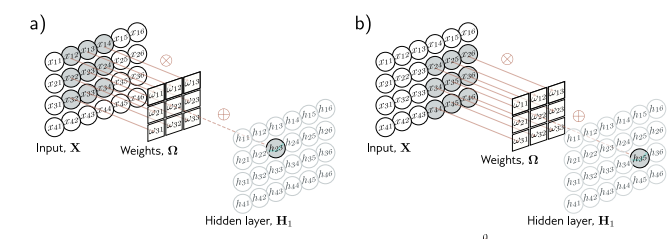

- We can see from the **image that each neuron** in the output layer **is looking only at a specific region**

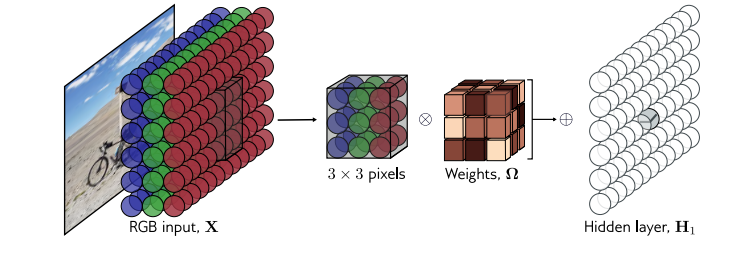

- The same thing we can see **through this image** what's going on.

## **Output Dimension of a convolution layer**

- The **output of a convolutional** layer produces a **feature map**, this feature map describes the patterns extracted from the **input image** through the **convolutional operation.**

- **The output** of a convolutional layer most of the time is **always a tensor**, this tensor is composed of **width, height and depth.**

- The **depth** describes the **number of filters** that are applied to the **input image**...

- For **each filter** applied to the **input image** we have a **different kernel**, and that kernel produces a **different feature map**.

- The output size $( W_{\text{out}} \times H_{\text{out}} )$ of a convolutional layer can be **calculated using**:

$$
W_{\text{out}} = \left\lfloor \frac{W + 2P - F_w}{S} \right\rfloor + 1
$$

$$
H_{\text{out}} = \left\lfloor \frac{H + 2P - F_h}{S} \right\rfloor + 1
$$

- **Where**:
 $( W )$ and $( H )$: Input spatial dimensions (width and height).

 $( F_w )$ and $( F_h )$: Filter dimensions (**width and height**).

 $( S )$: Stride of the convolution.
 $( P )$: Padding applied to the input.



- These formulas determine the spatial dimensions $( W_{{out}} )$ and $( H_{\text{out}} $) of the output feature map after convolution. Key factors influencing output size include input dimensions, filter size, stride, and padding.


##**Pooling Layer**

- The pooling layer is a shrinking layer, i.e. it is a resizing layer.

- This layer allows you to **summarize the statistics** of an **entire neighborhood**

- Let's understand **what that means**

###**Pooling layer intuition**

- When the image goes through a convolution layer, the image is convoluted by a kernel, in this case filters, this filter allows you to **extract resources in the image** as we said before, **detecting edges, textures along the image**.

- However, the resources extracted after the convolution operation a**re not always significant**, so the pooling layer allows you to **extract only useful and important information for other layers.**

- Let's **look at an example**

In [29]:
# @title **Viewing Pooling Layer**
from IPython.display import display, Image
gif_url = "https://cdn-images-1.medium.com/max/726/1*fXxDBsJ96FKEtMOa9vNgjA.gif"
display(Image(url=gif_url, width=550, height=350))

- For this case, we have a **trait map**, that map goes through a **pooling layer**.

- **Pay attention here** because there are **different layers of pooling.**..

- There are **different types of pooling layers**, such as **max pooling**,**average pooling**, and **global average pooling.**

- Each one plays an important role. However, the most commonly used is **Maxpooling.**

- For example, at the **maximum pooling layer**, only the **maximum value** that is **within a specific** kernel-defined zone is **passed to another layer** while others are **excluded**.

- When only the **maximum value** that is within a specific region is transferred to **another layer in the maximum pooling layer**, it causes a **loss of information** in relation to that feature map.


- However, for the image **classification task** it would only be useful to consider the **best information gain** and **exclude non-relevant information** in each sub-region of the tensor .


- But for **other layers** like the **average pooling** layer and the global **Average pooling** layer, some **non-pertinent information is considered.**

- The output of a **subsampling** (or Average pooling) operation can be described by:

$$
S_p(i, j) = \frac{1}{4} \sum_{u=0}^{1} \sum_{v=0}^{1} C_p(2i - u, 2j - v), \quad i, j = 1, 2, \ldots, l
$$


- The output of a max pooling operation can be described by:

$$
S_p(i, j) = \max_{0 \leq u < 2, 0 \leq v < 2} C_p(2i + u, 2j + v), \quad i, j = 0, 1, 2, \ldots, \frac{l}{2} - 1
$$


- **Note**: When we apply a convolutional operation, most of the time we apply **more than one filter**, so the **output is a tensor with depth dimensions.**

- When the **image arrives at the pooling layer**, the pooling operation is **performed along the tensor**.

##**CNN Architecture**

- Let's understand **CNN's architecture**

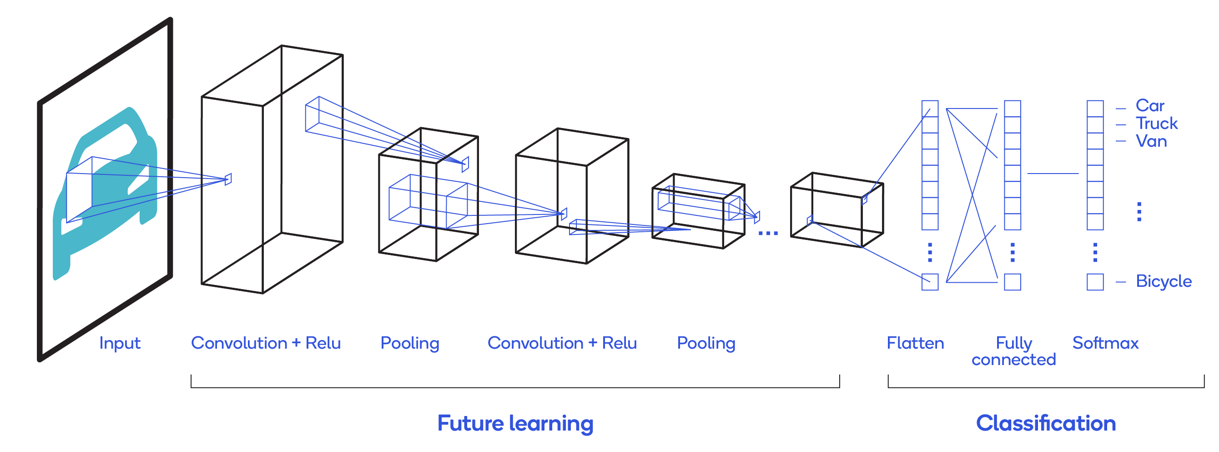

- The architecture of **convolutional layers** is different from that of **DNNs**

-  That's because CNN architectures were created to handle images as **inputs** to the neural network

Depending on the **type of architecture**, convolutional neural networks consist of:
- **1-Convolutional layers**
-**2-Pooling layers**
- **3-Flattening layers**
- **4-Fully connected layers**

- Why fully connected **layers (DNN)?**

- Convolutional layers, are layers that deal with **feature extraction**, such as **detecting edges and textures in images.**

- **The fully connected layers** are used to combine the resources extracted by the CNN layers and combine the extracted resources in a hierarchical fashion, combining **low-level**,**intermediate-level**, and **high-level information.**

- **Flattening layers** are used because fully connected layers do not **handle spatial information**. They only deal **with 1D data**, so it is necessary to **flatten** the **feature maps**so that the spatial information is passed correctly to the DNN layers.

In [30]:
# @title **Viewing Full Convolution Operation in Architectures**
from IPython.display import display, Image
gif_url = "https://github.com/helblazer811/ManimML/raw/main/assets/readme/convolutional_neural_network_with_an_image.gif"
display(Image(url=gif_url, width=600, height=250))


- There are different **types of CNN architectures**, but here we will use **2 types**, which are: **RestNet**, and **Xception**

###**RestNet**

- Restnet is one of the **best CNN architectures**, restnet is made up of several deep convolutional layers, called **residual blocks**

####**Restnet intuition**

- The idea of restnet is to make the training of deep neural networks as **efficient as possible**, which since training deep neural networks is **very complicated**.

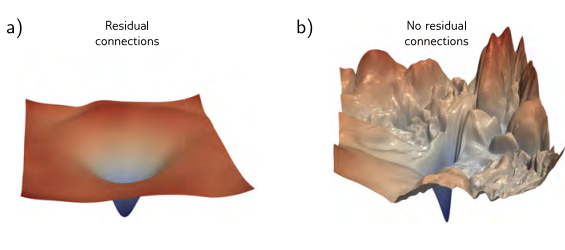

- When we train deep neural networks, the goal is to map a function $H(X)$ through its inputs so that it approximates the desired outputs.

- Instead of the network learning in this way $H(X)$ , it has a **residual learning** $F(X):=H(X)-X$, $F(X)+X$, it calculates what is **missing to get to the goal**, and we add **what is missing**, which in this case is the **inputs**

- There are a few main problems when we're training fully deep networks.

- **1-Input Signal Loss**
- 2-The **gradients become unstable** as it approaches the **lower layers**

- The restnet brought the solution to this problem by preserving the **input signal**, and allowing the calculated gradients to **flow appropriately along the lower layers**

- This is possible thanks to **skip connections.**

- **skip connections** allow gradients to be propagated efficiently, that said, it is now possible to **train deep neural networks with many layers**, thanks to skip connections.

#####**RestNet  Architecture**


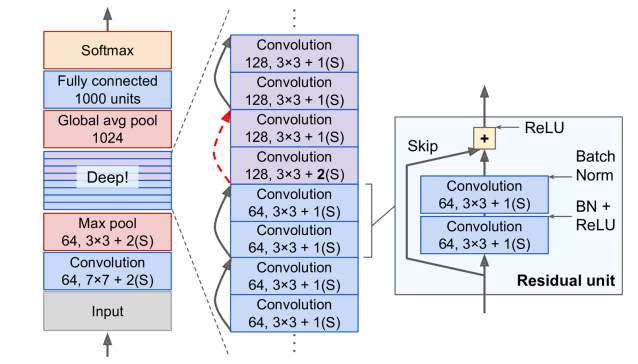

- In addition to connection hops in restnet architectures, **batch normalization** has also been added to **improve model training.**

###**Xception**

- Another very **famous architecture is Xception**, this architecture is a junction of two **famous architectures** ... **Restnet and Inception**

- Xception is also **called** a **depth separable convolution layer**

####**Xception intuition**

- The **idea** of **Xception is to apply convolution** in a **separable way**, that is, instead of convoluting on all input channels as is done in other architectures, we apply **each specific filter separately on each input channel**.

- Separable convolutional layer makes the strong
 assumption that **spatial patterns** and **cross-channel patterns** can be
 modeled **separately** .

- it is composed of two parts:
 the first part applies a **single spatial filter for each input feature map**, then
 **the second part looks exclusively for cross-channel patterns—it** is just a
 regular convolutional layer with 1 × 1 filters.

#####**Xception Architecture**

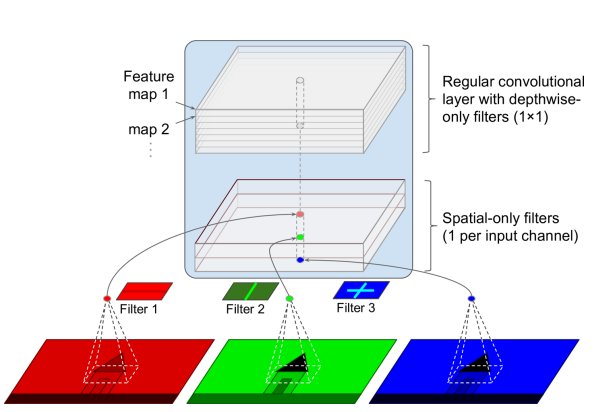

#**5-Data Preprocessing**

- Before feeding the images into the model, we first need to **pre-process the images**, this is because it is always advisable, because of some models that do not **handle well** when the data **is not pre-processed**

- Note: We will use the **preprocessing functions** that some **models already implement**.

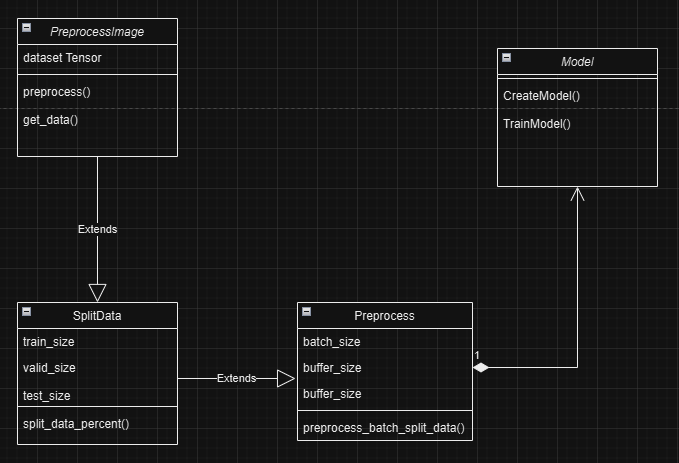

In [31]:
import random
import tensorflow as tf
from tensorflow import keras
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
os.environ['PYTHONHASHSEED'] = str(seed_value)


In [32]:
class PreProcessImages:
    def __init__(self):
        self.data = None

    def preprocess_image(self, image, label):
        resize_image = tf.image.resize(image, (224, 224))
        final_images = keras.applications.resnet50.preprocess_input(resize_image)
        return final_images, label

    def get_data(self):
        try:
            if self.data is None:
                self.data = tf.keras.utils.image_dataset_from_directory(
                    directory='/content/drive/MyDrive/Images'
                ).map(self.preprocess_image)
            return self.data
        except (ValueError, TypeError) as e:
            raise type(e)(f'Error type: {e}')


#**6-Split Data**

- Once the **preprocessing function is ready**, it is necessary to split the **training**, **validation**, and **test data**

In [33]:
class SplitData(PreProcessImages):
    def __init__(self, train_data_percent, val_data_percent, test_data_percent):
        super().__init__()
        self.train_data_percent = train_data_percent
        self.val_data_percent = val_data_percent
        self.test_data_percent = test_data_percent
        self.data = super().get_data()

    def split_data_percent(self):
        total_size = len(self.data)
        train_size = int(self.train_data_percent * total_size)
        val_size = int(self.val_data_percent * total_size)
        test_size = total_size - train_size - val_size
        return train_size, val_size, test_size


In [34]:
class PreProcess(SplitData):
    def __init__(self, train_data_percent, val_data_percent, test_data_percent, batch_size, buffer_size, **kwargs):
        super().__init__(train_data_percent, val_data_percent, test_data_percent)
        self.batch_size = batch_size
        self.buffer_size = buffer_size

    def preprocess_batch_split_data(self):
        train_size, val_size, test_size = self.split_data_percent()

        train_data = self.data.take(train_size)
        val_data = self.data.skip(train_size).take(val_size)
        test_data = self.data.skip(train_size + val_size).take(test_size)

        train = train_data.shuffle(self.buffer_size).prefetch(1) #Shuffling the Images
        val = val_data.shuffle(self.buffer_size).prefetch(1)  #Using Prefetch to speed up training
        test = test_data.shuffle(self.buffer_size).prefetch(1)

        return train, val, test


In [35]:
preprocess=PreProcess(0.8,0.1,0.2,128,10)
train,val,test=preprocess.preprocess_batch_split_data()

Found 2284 files belonging to 2 classes.


In [36]:
X=next(iter(train))[0]

- **Prefetch allows** you to speed up the training of the model, allowing the **preparation of batches** but quickly **fast**. allowing you to use the **GPU more powerfully**

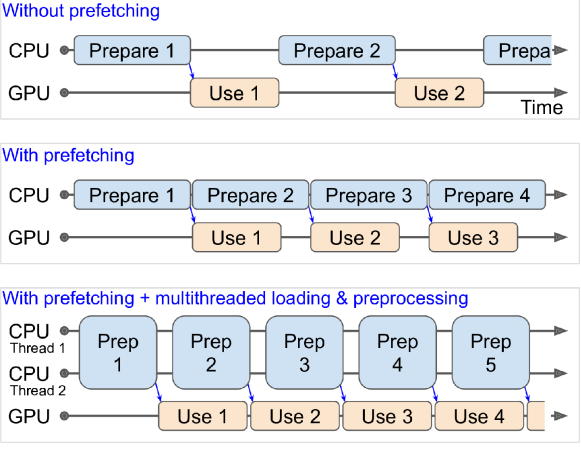

- With the keras api, we don't need to **create models from scratch**, we will use the **transfer of learning** to use the layers already trained on **datasets such as imagenet** for example.

#**7-Transfer  Learning**

- The transfer of learning has become very useful since we don't have to train **models from scratch.**

- The transfer of learning allows you to use the layers already **trained in other datasets**, in this case the goal is to use the **weights** of these layers for a specific task.

- When we perform learning transfer, we perform the **training 2 times**.

##**2 Types of training for transfer learning**

- 1-**The first training** allows her to adjust the weights  
 of the upper layers without **affecting the weights** of the **previous layers**, let's give her time to learn the best weights.

- **2-The second training** is used to **propagate all the weights to the lower layers**, that is, we adjust all the weights.

- To do this, let's create a **data structure to store 2 training models.**

In [37]:
# @title **Viewing  LinkedList For Model**
from IPython.display import display, Image
gif_url = "https://s3.amazonaws.com/stackabuse/media/linked-list-programming-interview-questions-1.gif"
display(Image(url=gif_url, width=600, height=250))


In [38]:
class NodeList:
  def __init__(self,data_object,prefix_model):
    self.data_object=data_object
    self.next=None
    self.prefix_model=prefix_model

In [39]:
class StackModel:  #linkedLits
  def __init__(self):
    self.head=None
    self.tail=None

  def push_model(self,model_object,prefix_model):
    Node=NodeList(model_object,prefix_model)

    if self.head is None and self.tail is None:
      self.head=Node
      self.tail=Node

    Node.next=self.head
    self.head=Node

    return Node

In [40]:
class Model:
    def __init__(self, learning_rate):
        self.MODEL = None
        self.learning_rate = learning_rate
        self.preprocess = PreProcess(0.8, 0.2, 0.1, 64, 1000)
        self.train, self.valid, self.test = self.preprocess.preprocess_batch_split_data()
        self.batch_size = self.preprocess.batch_size
        self.stack = None
        self.model_history = None

    def createModel(self):#transfer learning
        base_model = keras.applications.ResNet50(weights='imagenet', include_top=False)
        x = keras.layers.GlobalAveragePooling2D()(base_model.output)
        x = keras.layers.BatchNormalization()(x)
        x = keras.layers.Dense(1024, activation='relu', kernel_initializer='he_uniform')(x)
        x = keras.layers.Dropout(0.5)(x)
        x = keras.layers.BatchNormalization()(x)
        output = keras.layers.Dense(1, activation='sigmoid')(x)
        self.MODEL = keras.Model(inputs=base_model.input, outputs=output)
        return self.MODEL

    def compile_model(self, trainable=None):
        try:
            if self.MODEL is None:
                self.MODEL = self.createModel()

            for layer in self.MODEL.layers:
                layer.trainable = trainable

            self.MODEL.compile(
                loss=keras.losses.BinaryCrossentropy(),
                optimizer=keras.optimizers.SGD(learning_rate=self.learning_rate, momentum=0.9, nesterov=True),
                metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()],
            )
            return self.MODEL
        except ValueError as e:
            raise type(e)(f'Error as {e}')

    def fit_model(self, prefix_name_model, layers):#Stacking 2 Created model  in a Linked List
        self.stack = StackModel()
        compiled_model = self.compile_model(trainable=layers)
        stack_node = self.stack.push_model(compiled_model, prefix_name_model)
        self.model_history = stack_node.data_object.fit(
            self.train,
            epochs=10,
            validation_data=self.valid,
            batch_size=self.batch_size,
            callbacks=[keras.callbacks.EarlyStopping(patience=5)]
             #Using EarlyStopping to stop training if there is no improvement after 10 epochs  of training
        )

    def plot_model_error_train_test(self):
        try:
            if self.model_history is None:
                raise Exception('Model not trained')
            pd.DataFrame(self.model_history.history).plot(figsize=(8, 5))
            plt.grid(True)
            plt.gca().set_ylim(0, 1)
            plt.show()
        except Exception as e:
            print(f'{e}')

#**8-Training Model**

In [41]:
model=Model(0.0001)

Found 2284 files belonging to 2 classes.


In [42]:
model.fit_model(prefix_name_model='pre_train',layers=False)  #First training with the upper layers frozen

Epoch 1/10
57/57 [==============================] - 49s 752ms/step - loss: 0.8194 - accuracy: 0.5417 - precision: 0.4848 - recall: 0.4312 - val_loss: 0.6448 - val_accuracy: 0.6138 - val_precision: 0.6446 - val_recall: 0.3750
Epoch 2/10
57/57 [==============================] - 45s 740ms/step - loss: 0.8138 - accuracy: 0.5543 - precision: 0.4967 - recall: 0.4604 - val_loss: 0.6581 - val_accuracy: 0.6004 - val_precision: 0.6047 - val_recall: 0.3786
Epoch 3/10
57/57 [==============================] - 45s 739ms/step - loss: 0.8424 - accuracy: 0.5258 - precision: 0.4636 - recall: 0.4242 - val_loss: 0.6497 - val_accuracy: 0.6138 - val_precision: 0.6279 - val_recall: 0.3932
Epoch 4/10
57/57 [==============================] - 44s 721ms/step - loss: 0.8385 - accuracy: 0.5225 - precision: 0.4600 - recall: 0.4254 - val_loss: 0.6448 - val_accuracy: 0.6161 - val_precision: 0.6341 - val_recall: 0.3805
Epoch 5/10
57/57 [==============================] - 44s 716ms/step - loss: 0.8265 - accuracy: 0.5285

In [43]:
model.fit_model(prefix_name_model='full',layers=True) #Second training with all layers thawed

Epoch 1/10
57/57 [==============================] - 138s 2s/step - loss: 0.6178 - accuracy: 0.6798 - precision_1: 0.6238 - recall_1: 0.7009 - val_loss: 0.4254 - val_accuracy: 0.8147 - val_precision_1: 0.9110 - val_recall_1: 0.6552
Epoch 2/10
57/57 [==============================] - 127s 2s/step - loss: 0.2927 - accuracy: 0.8816 - precision_1: 0.8344 - recall_1: 0.9181 - val_loss: 0.2817 - val_accuracy: 0.9085 - val_precision_1: 0.9940 - val_recall_1: 0.8049
Epoch 3/10
57/57 [==============================] - 126s 2s/step - loss: 0.1844 - accuracy: 0.9419 - precision_1: 0.9105 - recall_1: 0.9675 - val_loss: 0.1585 - val_accuracy: 0.9621 - val_precision_1: 0.9898 - val_recall_1: 0.9282
Epoch 4/10
57/57 [==============================] - 126s 2s/step - loss: 0.1439 - accuracy: 0.9583 - precision_1: 0.9298 - recall_1: 0.9803 - val_loss: 0.0850 - val_accuracy: 0.9866 - val_precision_1: 0.9852 - val_recall_1: 0.9852
Epoch 5/10
57/57 [==============================] - 125s 2s/step - loss: 0.1

# **9-Evaluating the Model / Metrics**

In [44]:
class Metrics:
    def __init__(self, model):
        self.model = model
        self.all_metrics = []


    def check_model(self):
      if self.model.MODEL is None:
        raise Exception(f'Error,The model is not trained')

      return self.model


    def get_metrics(self):
        try:
            if self.model.model_history is None:
                raise Exception('Model history is empty')

            self.all_metrics = list(self.model.model_history.history.keys())

            return self.all_metrics

        except ValueError as e:
            raise type(e)(f'{e}')

    def evaluate_model(self):
      self.model=self.check_model()
      y_pred=self.model.MODEL.evaluate(self.model.test)

      return y_pred

    def plot_individual_metrics(self,name_metric_train,name_metric_test,prefix_name):

      try:
        name_metric_test=str(name_metric_test)
        name_metric_train=str(name_metric_train)

        if name_metric_test and name_metric_train in self.all_metrics:

           fig,ax=plt.subplots(figsize=(6,5))
           plt.plot(pd.DataFrame(self.model.model_history.history[name_metric_train]),label='Train')
           plt.plot(pd.DataFrame(self.model.model_history.history[name_metric_test]),label='validation')
           plt.title(f'{prefix_name}')
           plt.xlabel(f'Epoch')
           plt.ylabel(f'{prefix_name}')
           plt.legend(loc='upper left')
           plt.grid(True)
           plt.gca().set_ylim(0, 1)
           plt.show()

      except TypeError as e:
        raise type(e)(f'Error')

    def plot_metrics(self):
        try:
            loss, accuracy, precision, recall, val_loss, val_accuracy, val_precision, val_recall = self.get_metrics()

            plt.style.use('ggplot')
            fig, ax = plt.subplots(1, 4, figsize=(20, 6))

            ax[0].plot(self.model.model_history.history[accuracy], label='Train')
            ax[0].plot(self.model.model_history.history[val_accuracy], label='Validation')
            ax[0].set_title('Model Accuracy')
            ax[0].set_ylabel('Accuracy')
            ax[0].set_xlabel('Epoch')
            ax[0].legend(loc='upper right')
            ax[0].grid(True)

            ax[1].plot(self.model.model_history.history[loss], label='Train')
            ax[1].plot(self.model.model_history.history[val_loss], label='Validation')
            ax[1].set_title('Model Loss')
            ax[1].set_ylabel('Loss')
            ax[1].set_xlabel('Epoch')
            ax[1].legend(loc='upper left')
            ax[1].grid(True)

            ax[2].plot(self.model.model_history.history[precision], label='Train')
            ax[2].plot(self.model.model_history.history[val_precision], label='Validation')
            ax[2].set_title('Model Precision')
            ax[2].set_ylabel('Precision')
            ax[2].set_xlabel('Epoch')
            ax[2].legend(loc='upper left')
            ax[2].grid(True)

            ax[3].plot(self.model.model_history.history[recall], label='Train')
            ax[3].plot(self.model.model_history.history[val_recall], label='Validation')
            ax[3].set_title('Model Recall')
            ax[3].set_ylabel('Recall')
            ax[3].set_xlabel('Epoch')
            ax[3].legend(loc='upper left')
            ax[3].grid(True)

            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f'{e}')


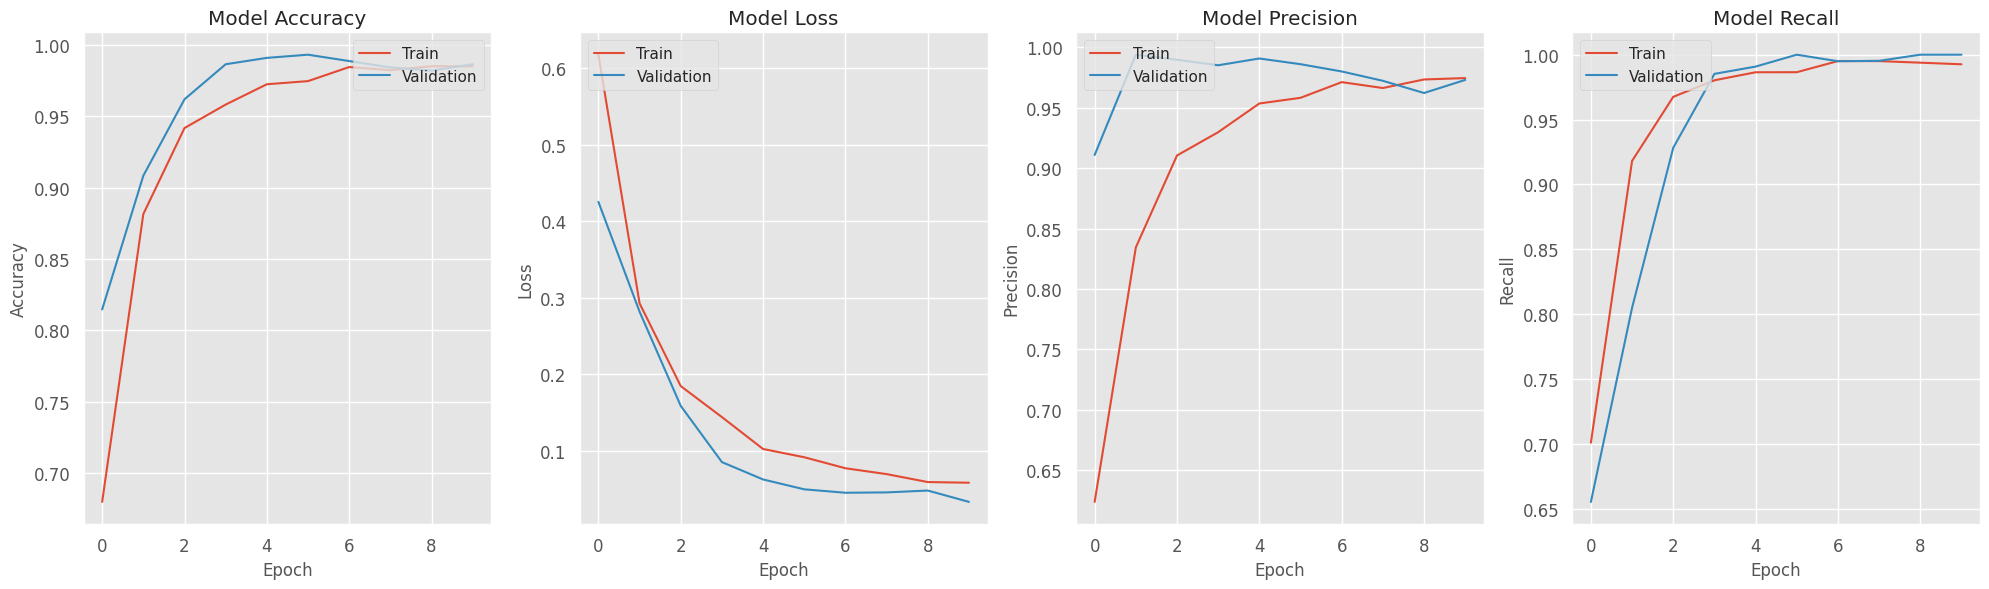

In [45]:
metrics=Metrics(model)
metrics.plot_metrics()

- **Evaluating the model on the test data.**

In [46]:
metrics.evaluate_model()

1/1 [==============================] - 3s 3s/step - loss: 0.0139 - accuracy: 1.0000 - precision_1: 1.0000 - recall_1: 1.0000


[0.01385883241891861, 1.0, 1.0, 1.0]

- The model performed very well on the **test data** for **both accuracy, precision, and recall**

- The same is true for **training data.**

In [47]:
metrics.all_metrics

['loss',
 'accuracy',
 'precision_1',
 'recall_1',
 'val_loss',
 'val_accuracy',
 'val_precision_1',
 'val_recall_1']

#**8-Viewing Model Classification Metrics**

##**1-Loss of training and validation**

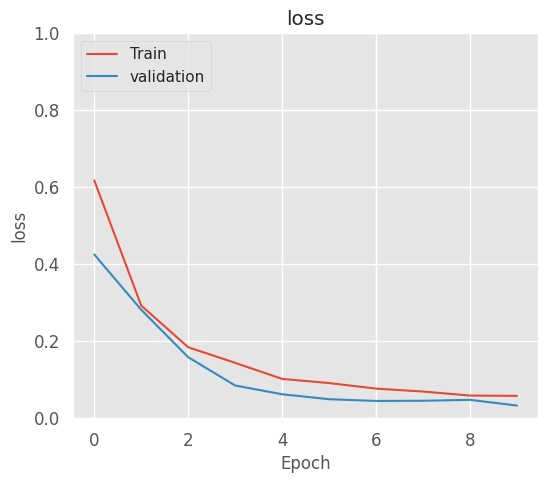

In [48]:
metrics.plot_individual_metrics('loss','val_loss','loss')

##**2-Training & Test Accuracy**

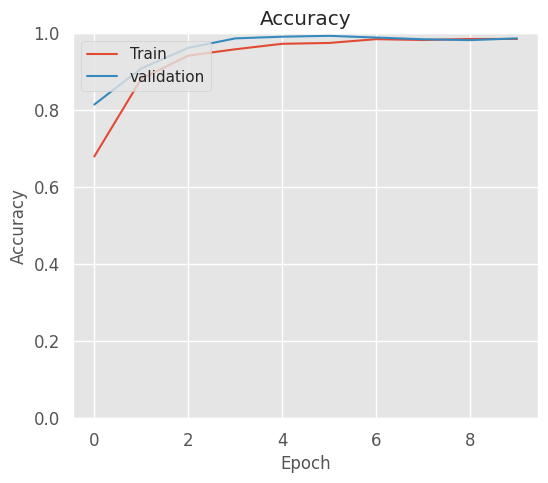

In [49]:
metrics.plot_individual_metrics('accuracy','val_accuracy','Accuracy')

##**3-Precision, Training & Testing**

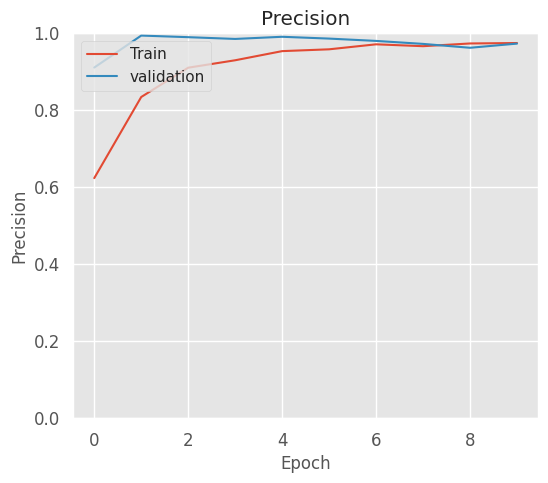

In [50]:
metrics.plot_individual_metrics('precision_1','val_precision_1','Precision')

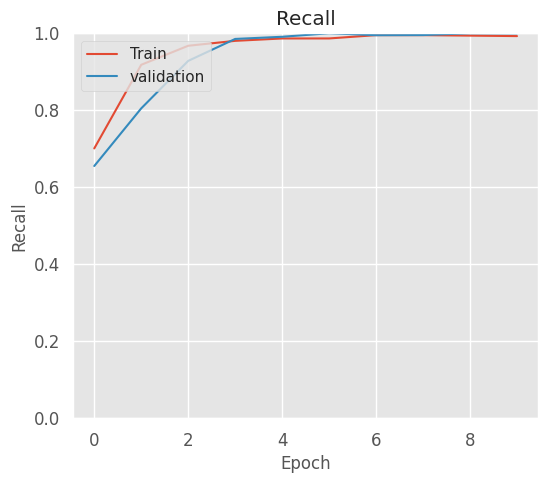

In [51]:
metrics.plot_individual_metrics('recall_1','val_recall_1','Recall')

#**9-SAVE MODEL**

In [52]:
def save_model(prefix_name,model):
  try:
    prefix_name=str(prefix_name)
    model.save(prefix_name)

  except TypeError as e:
    raise type(e)(f'Error {e}')

- Now we have the **model trained** and ready t**o make new predictions..**

In [53]:
save_model('model_image.h5',model.MODEL)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



# **10-Making New Predictions**

- Let's create a **stack** with 5 images to **make new predictions with images** that the **model has never seen**.

- Creating the Stack to **Stack the Images**

- Let's take the **images out of the directory**

In [54]:
def take_images_to_predict(path_file):

  array_images=[]

  try:
    path_file=str(path_file)

    for image in os.listdir(path_file):
      array_images.append(image)

    array_images=sorted(array_images)

    return array_images
  except TypeError as e:
    raise type(e)(f'Error:{e}')


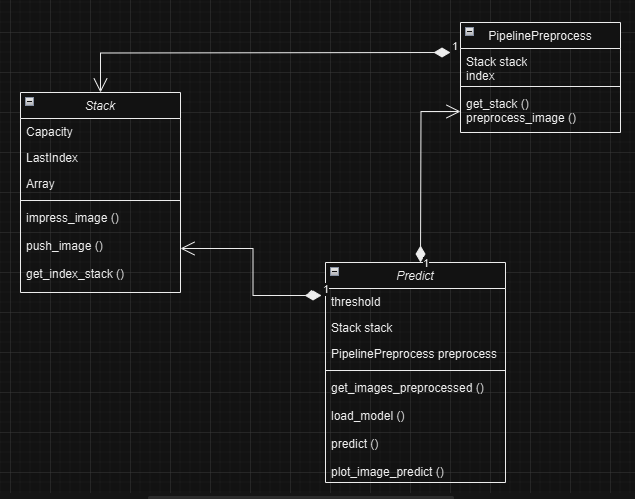

- Creating the Stack **Data Structure** to Stack the Images

In [55]:
class Stack:
  def __init__(self,capacity):

    self.capacity=capacity
    self.lastIndex=-1
    self.array=np.empty(self.capacity,dtype=np.object_)
    self.path='/content/drive/MyDrive/PessoasComolhosabertosfechados'
    self.count_index=0

  def print_images(self):
    if self.lastIndex==-1:
      raise Exception('Error,stack is empty')

    for index in range(self.lastIndex+1):
      plt.figure(figsize=(6,4))
      X=plt.imread(self.array[index])
      plt.imshow(X,cmap='gray',interpolation='nearest')
      plt.grid(False)
      plt.axis('off')

  def push_images(self,images):

    if self.lastIndex==self.capacity-1:
      raise Exception('Error')

    self.lastIndex+=1
    self.array[self.lastIndex]=f'/{self.path}/{images}'
    self.count_index+=1

  def get_index_stack(self):
    if self.lastIndex==-1:
      return Exception(f'Error, stack is empty')

    return self.count_index

In [56]:
stack_images=Stack(8)

In [57]:
take_images=take_images_to_predict('/content/drive/MyDrive/PessoasComolhosabertosfechados')

In [58]:
take_images

['pessoa1.jpeg',
 'pessoa2.jpeg',
 'pessoa3.jpeg',
 'pessoa4.jpeg',
 'pessoa5.jpeg',
 'pessoa6.jpeg',
 'pessoa7.jpeg',
 'pessoa8.jpeg']

- **Stacking the Images** in the **Data Stack Structure**

In [59]:
stack_images.push_images(take_images[0])
stack_images.push_images(take_images[1])
stack_images.push_images(take_images[2])
stack_images.push_images(take_images[3])
stack_images.push_images(take_images[4])
stack_images.push_images(take_images[5])
stack_images.push_images(take_images[6])
stack_images.push_images(take_images[7])

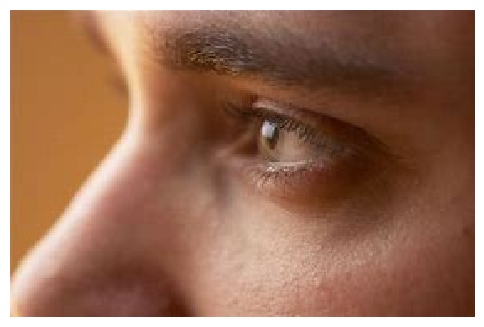

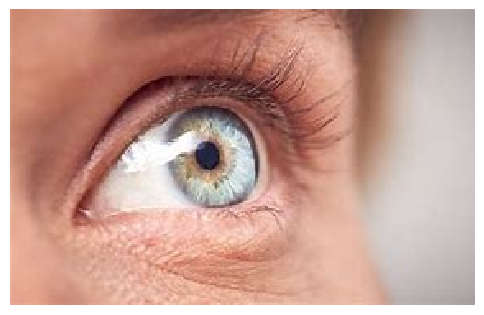

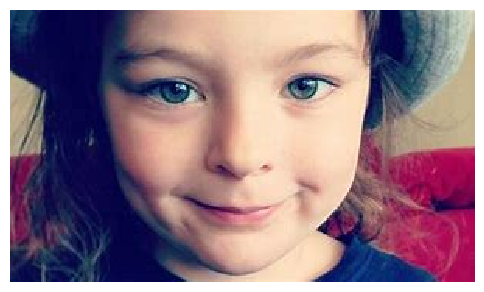

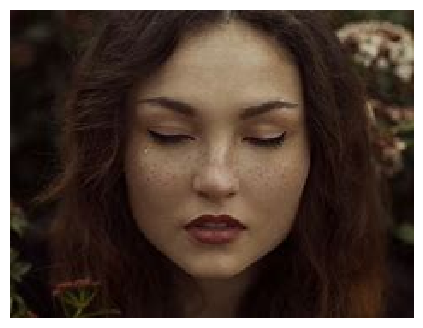

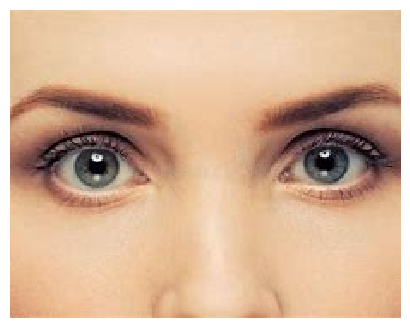

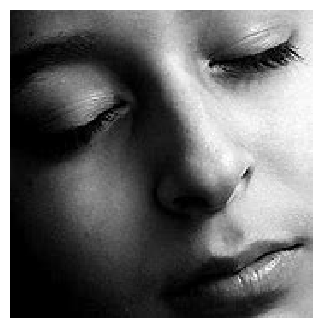

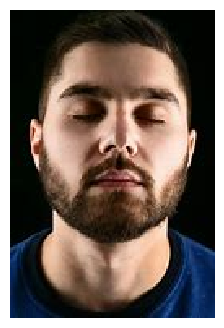

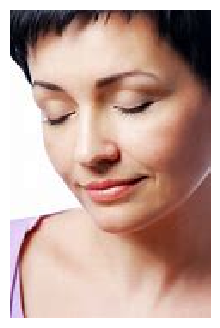

In [60]:
stack_images.print_images()

- Now let's **create a pipeline** for **processing the stacked images to be stored in the model**

##11- **Creation of pipelines** for **prediction** of **stacked images**.

###**1-Creating the Class for the Preprocessing Pipeline**

In [61]:
class PipelinePreprocessImage:
  def __init__(self,stack):
    self.stack=stack
    self.index=np.arange(self.stack.get_index_stack())
    self.elements=None

  def get_stack(self):
    if not self.stack:
      raise Exception(f'Error the stack is empty')

    return self.stack.array

  def preprocess_images_to_predict(self,index): #Processing the Image to Impute to the Model.

    if index not in self.index:
      raise Exception(f'Error,index out of range..')

    image=plt.imread(self.stack.array[index])

    image_resize=tf.image.resize(image,[244,244])

    final_image=keras.applications.resnet50.preprocess_input(image_resize)

    final_image=tf.expand_dims(final_image,axis=0)

    return final_image

##**12-Creating the Image Prediction Class**

In [62]:
class Predict:
  def __init__(self,threshold,stack):
    self.threshold=threshold
    self.stack=stack
    self.preprocess=PipelinePreprocessImage(stack)
    self.model=None


  def get_image_processed(self,index): #Getting the images already processed.
    image_preprocessed=self.preprocess.preprocess_images_to_predict(index)
    return image_preprocessed

  def load_model(self,path):#Loading the trained model
    try:
      path=str(path)
      model=tf.keras.models.load_model(path)

      return model

    except (ValueError,TypeError) as e:
      raise type(e)(f'Error:{e}')


  def predict(self,path,index): #Making the prediction with the training model

    if self.model is None:
      self.model=self.load_model(path)

    image_processed=self.get_image_processed(index)
    y_pred=self.model.predict(image_processed)

    if  y_pred >=self.threshold:
      print(f'Eyes closed,prob:{y_pred}')
      print(f'Predict class:{1}')
    else:
      print(f'Eyes open,prob:{y_pred}')
      print(f'Predict class :{0}')

  def plot_image_predict(self,index): #Plotting the image predicts

    image=plt.imread(self.preprocess.stack.array[index])

    plt.imshow(image,cmap='gray',interpolation='nearest')
    plt.axis('off')


- Attention: **stack_images** is the stack with the images already inserted

- In this case **stack_images** it's **the object** we need to pass to the **Pipeline and Prediict classes**

- **1-Instantiating the PipelinePreprocessImage Class**

In [63]:
preprocess_image=PipelinePreprocessImage(stack_images)

- **2-Preprocessing the Image Passed in the Stack at Position 4**

In [64]:
preprocessed_image=preprocess_image.preprocess_images_to_predict(5)

- **3-Instantiating the Predict class** and passing the **decision limit** of the model and **stack_images object as a parameter of the Predict class.**

In [65]:
predict=Predict(0.5,stack_images)

- **4-Accessing the predict** method of the Predict class to **perform the prediction**, in this case we need to pass the **path to load the already trained model.**

In [66]:
predict.predict('/content/model_image.h5',5)

1/1 [==============================] - 1s 1s/step
Eyes closed,prob:[[0.874471]]
Predict class:1


- **5- Plotting the image** that the model **effected the prediction.**

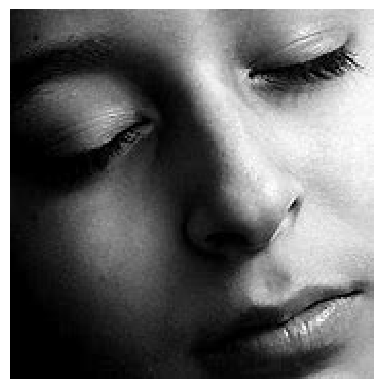

In [71]:
predict.plot_image_predict(5)

- Here is the image p**redicted by the model**, in this case with **0.87% confidence** that this person has their **eyes closed.**

(-0.5, 899.5, 1599.5, -0.5)

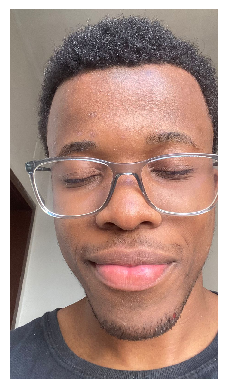

In [68]:
t=plt.imread('/content/Imagem do WhatsApp de 2024-06-18 à(s) 12.02.23_2405b8c8.jpg')
plt.imshow(t,cmap='gray',interpolation='nearest')
plt.axis('off')

In [69]:
t=tf.image.resize(t,[244,244])
t=keras.applications.resnet50.preprocess_input(t)
t=tf.expand_dims(t,axis=0)
y=predict.model.predict(t)

1/1 [==============================] - 0s 90ms/step


In [70]:
y

array([[0.91761106]], dtype=float32)

- **Probabality**

# **More than 40% of traffic accidents are due to drowsiness, says Abramet**

- **Sleep detection** **can greatly** decrease accidents at the bus station, this model can be used in real-time to help mitigate this **problem**.







- This created template can be used to solve many **problems**.... However it is **still static**, making it work in real time is a **big challenge.**

In [46]:
import tensorflow as tf
print(tf.__version__)


2.15.0
